In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Using sample rate=44100 Hz, FFT=1024 buckets, hop=768 samples, duration=2.0 sec = 114 time steps


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

Loaded 961 STFTs from STFTs.pkl


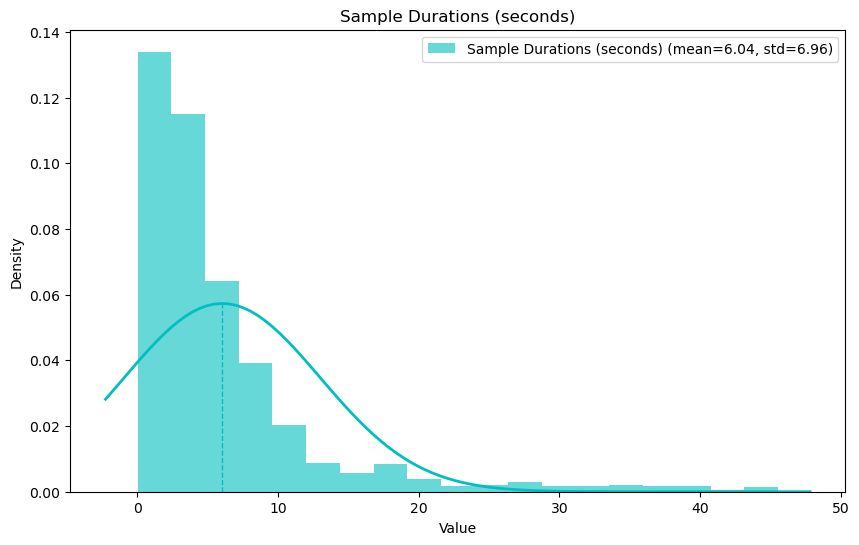

Augmenting training dataset using 190 random mixes
Using train=950 samples, test=190 samples.
0 training samples, 1024 frequencies, 114 time-steps, maximum model size is 22,179,840 parameters.
Using model=StepWiseMLP
Optimising hyper-parameters:


[Integer(low=4, high=8, prior='uniform', transform='identity'),
 Real(low=1e-07, high=0.01, prior='log-uniform', transform='identity'),
 Real(low=1e-09, high=0.01, prior='log-uniform', transform='identity'),
 Integer(low=10, high=200, prior='uniform', transform='identity'),
 Integer(low=1, high=7, prior='uniform', transform='identity'),
 Real(low=0.1, high=10, prior='log-uniform', transform='identity')]

Hyper-Parameter tuning#1: [params]

optimiser: Adam batch=64, learning_rate=0.00044, weight_decay=3.9e-07
StepWiseMLP control=155, depth=5, ratio=0.93
StepWiseMLPAutoEncoder compression: 6.6 x smaller
model=StepWiseMLP, approx size=10,311,659 parameters, exact=10,311,659, difference=0.0000%
model: StepWiseMLP control=155, depth=5, ratio=0.93 (size=10,311,659)
train=950 samples, batch=64 --> 14.8 batches/epoch
total=6 sec, epoch=1 (6.2 sec/epoch), train=5950.98 (0.00%), test=6137.93 (0.00%), overfit=1.03
total=12 sec, epoch=2 (6.0 sec/epoch), train=5301.10 (-10.92%), test=5455.23 (-11.12%), overfit=1.03
total=18 sec, epoch=3 (5.9 sec/epoch), train=4162.81 (-21.47%), test=4181.46 (-23.35%), overfit=1.00
total=23 sec, epoch=4 (5.9 sec/epoch), train=3271.25 (-21.42%), test=3655.58 (-12.58%), overfit=1.12
total=29 sec, epoch=5 (5.8 sec/epoch), train=3020.36 (-7.67%), test=3492.46 (-4.46%), overfit=1.16
total=35 sec, epoch=6 (5.8 sec/epoch), train=2822.29 (-6.56%), test=3295.45 (-5.64%), ove

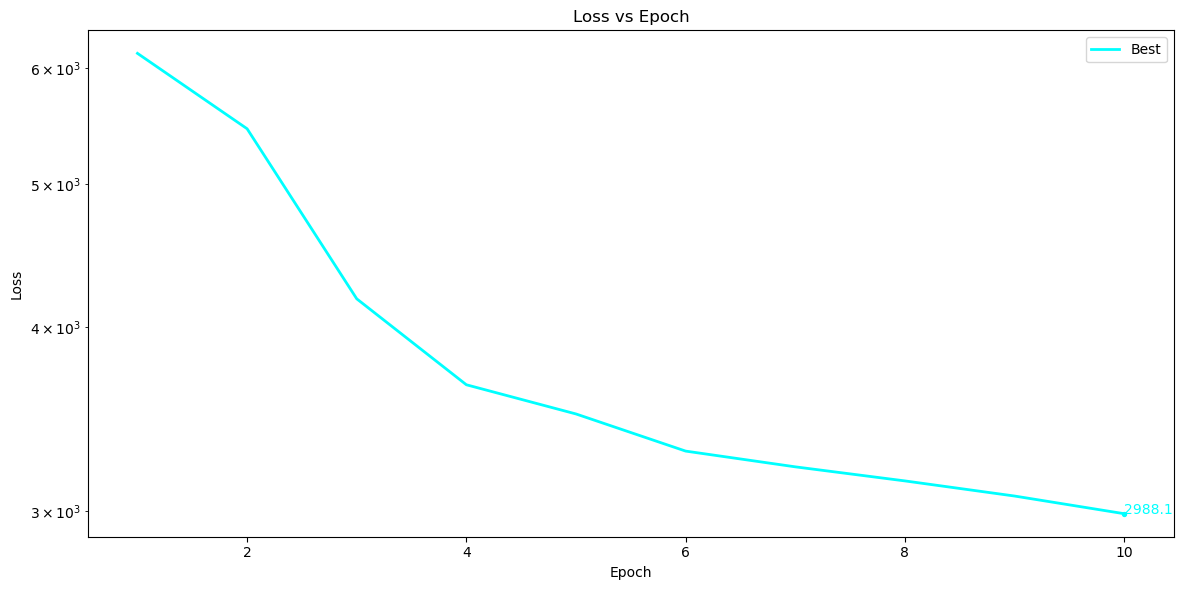

Hyper-Parameter tuning#2: [params]

optimiser: Adam batch=16, learning_rate=0.035, weight_decay=0.0012
StepWiseMLP control=60, depth=2, ratio=9.31
StepWiseMLPAutoEncoder compression: 17.1 x smaller
model=StepWiseMLP, approx size=1,235,064 parameters, exact=1,235,064, difference=0.0000%
model: StepWiseMLP control=60, depth=2, ratio=9.31 (size=1,235,064)
train=950 samples, batch=16 --> 59.4 batches/epoch
*** Aborting: model exploded, loss=nan vs max=30000
Hyper-Parameter tuning#3: [params]

optimiser: Adam batch=32, learning_rate=0.0039, weight_decay=7e-09
StepWiseMLP control=13, depth=3, ratio=2.94
StepWiseMLPAutoEncoder compression: 78.8 x smaller
model=StepWiseMLP, approx size=5,818,697 parameters, exact=5,818,697, difference=0.0000%
model: StepWiseMLP control=13, depth=3, ratio=2.94 (size=5,818,697)
train=950 samples, batch=32 --> 29.7 batches/epoch
*** Aborting: model exploded, loss=inf vs max=30000
Hyper-Parameter tuning#4: [params]

optimiser: Adam batch=128, learning_rate=5e-05, 

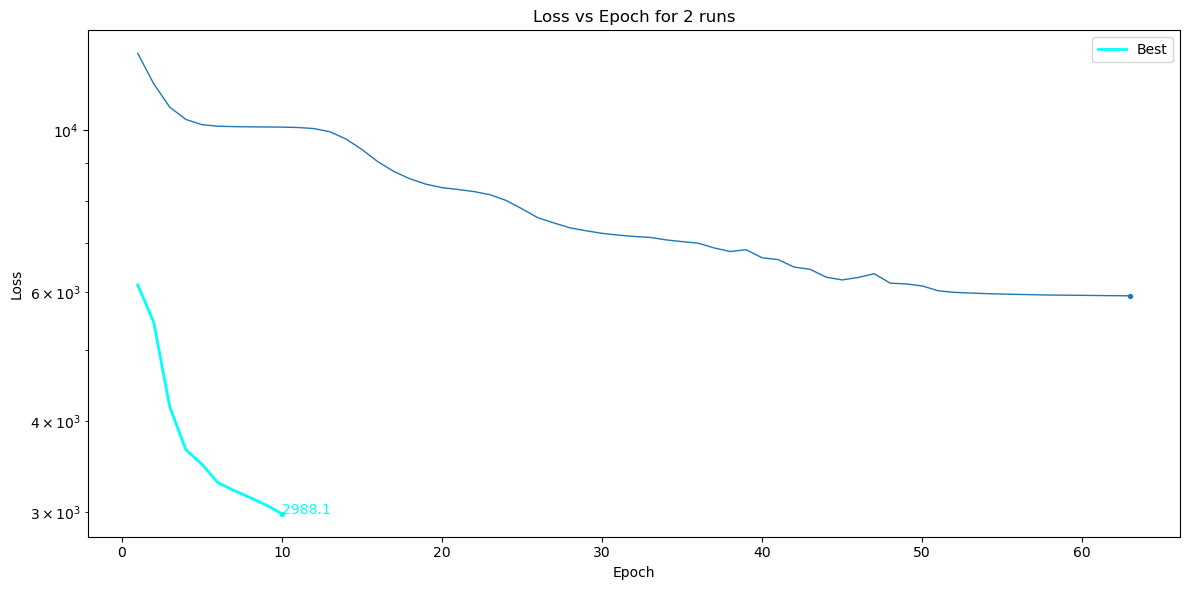

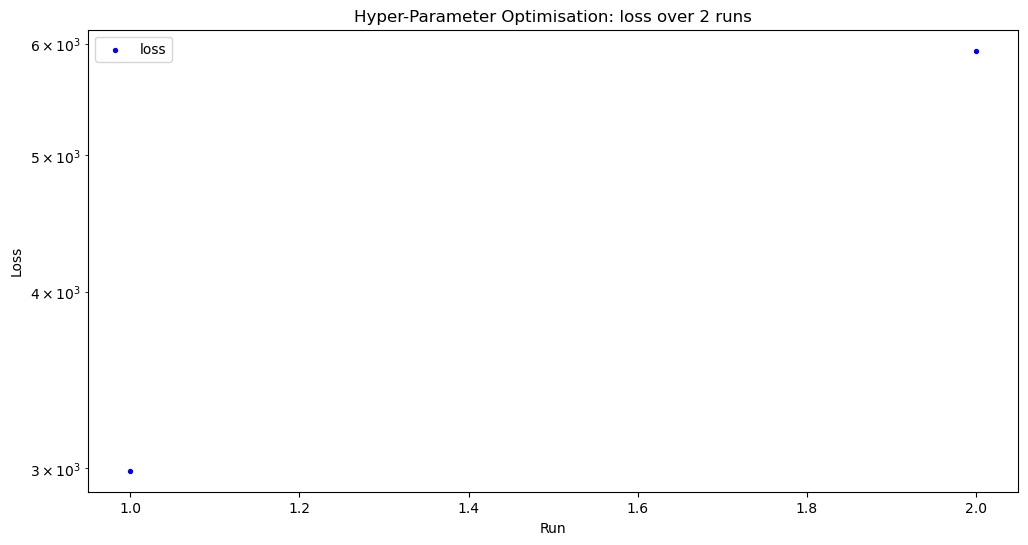

Hyper-Parameter tuning#5: [params]

optimiser: Adam batch=256, learning_rate=0.13, weight_decay=0.0093
StepWiseMLP control=179, depth=4, ratio=0.52
StepWiseMLPAutoEncoder compression: 5.7 x smaller
model=StepWiseMLP, approx size=6,251,615 parameters, exact=6,251,615, difference=0.0000%
model: StepWiseMLP control=179, depth=4, ratio=0.52 (size=6,251,615)
train=950 samples, batch=256 --> 3.7 batches/epoch
*** Aborting: model exploded, loss=34477.14 vs max=30000
Hyper-Parameter tuning#6: [params]

optimiser: Adam batch=64, learning_rate=0.0001, weight_decay=2.9e-06
StepWiseMLP control=84, depth=7, ratio=5.23
Model is too large: approx 25,719,211 parameters vs max=22,179,840
Hyper-Parameter tuning#7: [params]

optimiser: Adam batch=32, learning_rate=0.00093, weight_decay=0.00017
StepWiseMLP control=36, depth=5, ratio=0.17
StepWiseMLPAutoEncoder compression: 28.4 x smaller
model=StepWiseMLP, approx size=5,331,188 parameters, exact=5,331,188, difference=0.0000%
model: StepWiseMLP control=36,

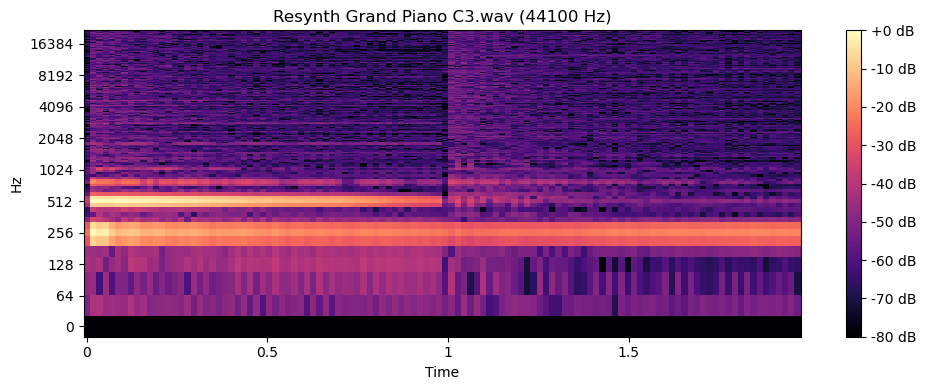

total=69 sec, epoch=6 (11.6 sec/epoch), train=1494.13 (-0.50%), test=1793.99 (-0.21%), overfit=1.20
total=81 sec, epoch=7 (11.6 sec/epoch), train=1485.54 (-0.57%), test=1771.80 (-1.24%), overfit=1.19
*** Best! loss=1401.87, StepWiseMLP control=36, depth=5, ratio=0.17 (size=5,331,188), Adam batch=32, learning_rate=0.00093, weight_decay=0.00017
hyper-parameters: [5, 2.9109570209546567e-05, 0.0001651427958676706, 36, 5, 0.1655046138113917]


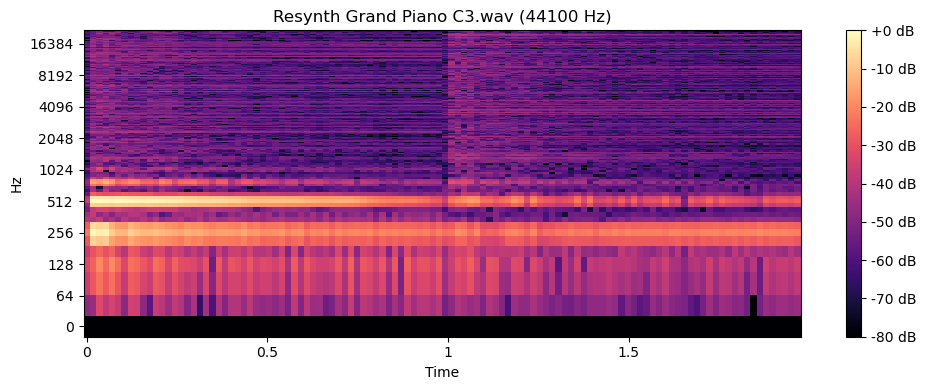

total=93 sec, epoch=8 (11.6 sec/epoch), train=1401.87 (-5.63%), test=1609.69 (-9.15%), overfit=1.15
*** Best! loss=1307.49, StepWiseMLP control=36, depth=5, ratio=0.17 (size=5,331,188), Adam batch=32, learning_rate=0.00093, weight_decay=0.00017
hyper-parameters: [5, 2.9109570209546567e-05, 0.0001651427958676706, 36, 5, 0.1655046138113917]


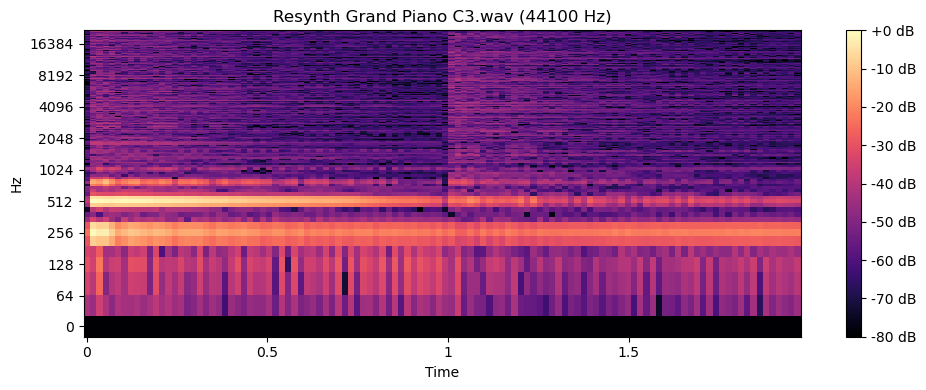

total=104 sec, epoch=9 (11.6 sec/epoch), train=1307.49 (-6.73%), test=1553.98 (-3.46%), overfit=1.19
total=116 sec, epoch=10 (11.6 sec/epoch), train=1247.42 (-4.59%), test=1470.50 (-5.37%), overfit=1.18
Model is overfitting: overfit=1.18 vs max=1.1


Finished Training after 10 epochs in 115.6 sec (11.56 sec/epoch), sample duration=2.0 sec, test loss=1470.50, train loss=1247.42, overfit=1.2


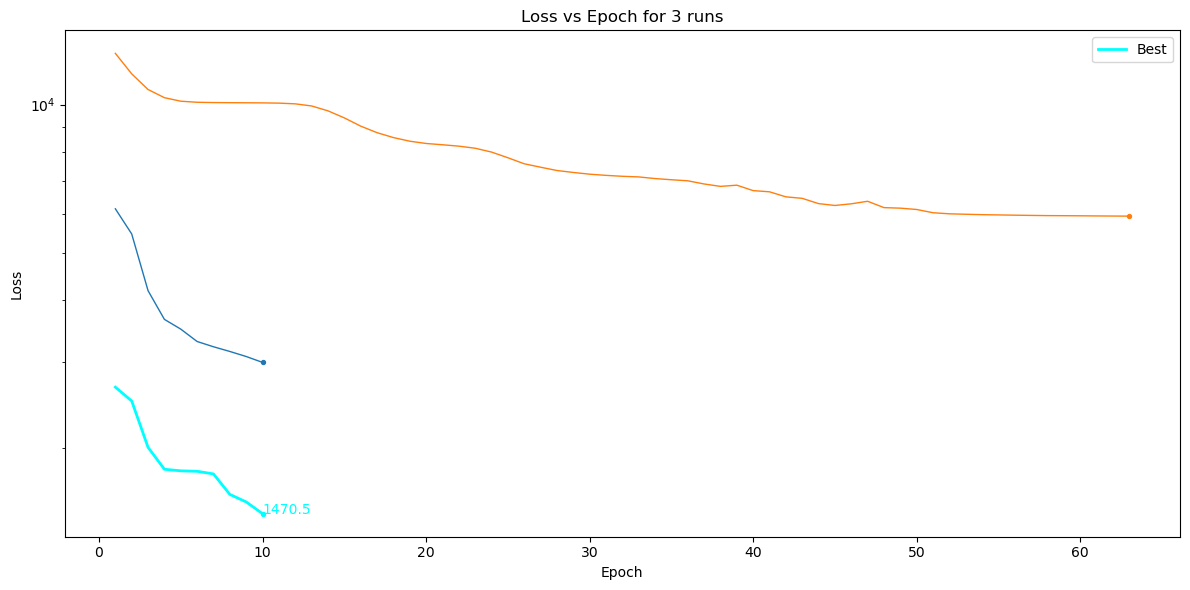



Best Models:
	1: loss=1470.5, for StepWiseMLP control=36, depth=5, ratio=0.17 (size=5,331,188), Adam batch=32, learning_rate=0.00093, weight_decay=0.00017
	2: loss=2988.1, for StepWiseMLP control=155, depth=5, ratio=0.93 (size=10,311,659), Adam batch=64, learning_rate=0.00044, weight_decay=3.9e-07
	3: loss=5930.3, for StepWiseMLP control=108, depth=6, ratio=0.29 (size=8,068,775), Adam batch=128, learning_rate=5e-05, weight_decay=2.2e-05


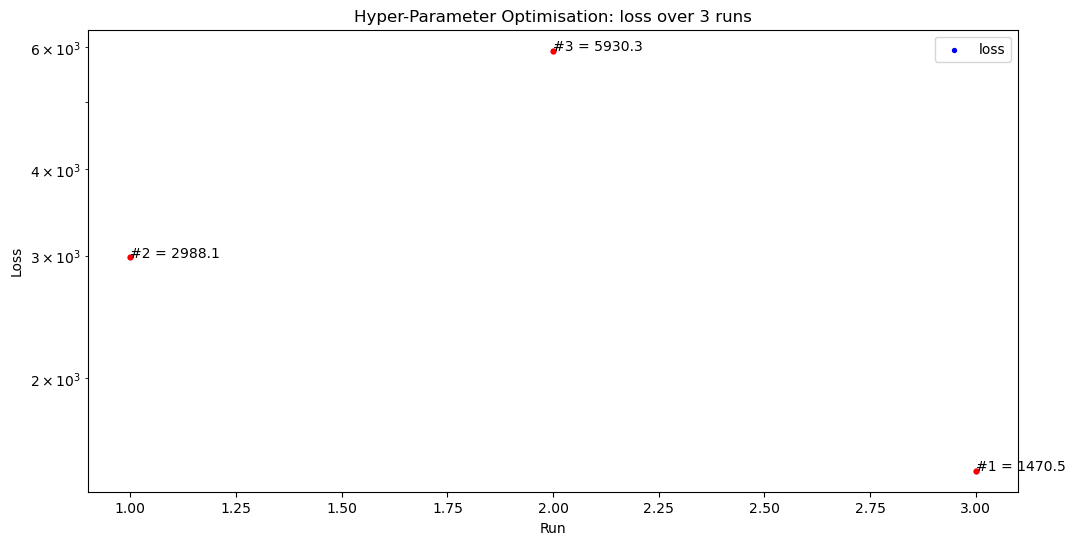

Hyper-Parameter tuning#8: [params]

optimiser: Adam batch=128, learning_rate=1.2, weight_decay=5.2e-08
StepWiseMLP control=131, depth=2, ratio=1.66
StepWiseMLPAutoEncoder compression: 7.8 x smaller
model=StepWiseMLP, approx size=1,453,318 parameters, exact=1,453,318, difference=0.0000%
model: StepWiseMLP control=131, depth=2, ratio=1.66 (size=1,453,318)
train=950 samples, batch=128 --> 7.4 batches/epoch
*** Aborting: model exploded, loss=nan vs max=30000
Hyper-Parameter tuning#9: [params]

optimiser: Adam batch=16, learning_rate=0.16, weight_decay=0.01
StepWiseMLP control=10, depth=5, ratio=0.10
StepWiseMLPAutoEncoder compression: 102.4 x smaller
model=StepWiseMLP, approx size=4,821,907 parameters, exact=4,821,907, difference=0.0000%
model: StepWiseMLP control=10, depth=5, ratio=0.10 (size=4,821,907)
train=950 samples, batch=16 --> 59.4 batches/epoch
*** Aborting: model exploded, loss=nan vs max=30000
Hyper-Parameter tuning#10: [params]

optimiser: Adam batch=32, learning_rate=0.00087,

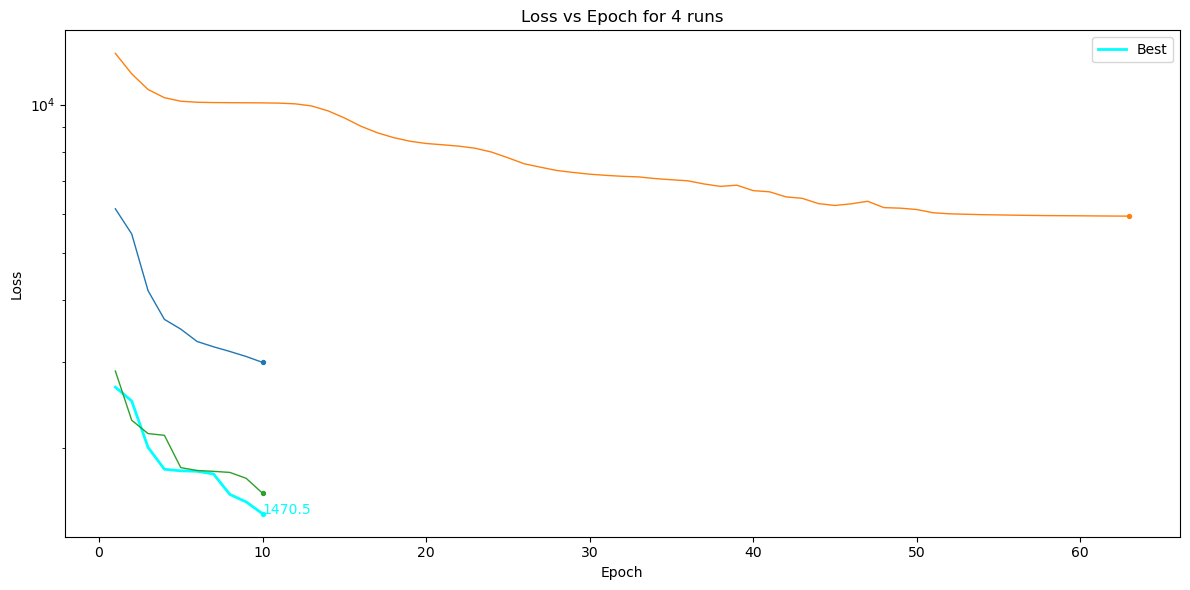



Best Models:
	1: loss=1470.5, for StepWiseMLP control=36, depth=5, ratio=0.17 (size=5,331,188), Adam batch=32, learning_rate=0.00093, weight_decay=0.00017
	2: loss=1618.6, for StepWiseMLP control=27, depth=5, ratio=0.14 (size=5,159,485), Adam batch=32, learning_rate=0.00087, weight_decay=0.00024
	3: loss=2988.1, for StepWiseMLP control=155, depth=5, ratio=0.93 (size=10,311,659), Adam batch=64, learning_rate=0.00044, weight_decay=3.9e-07


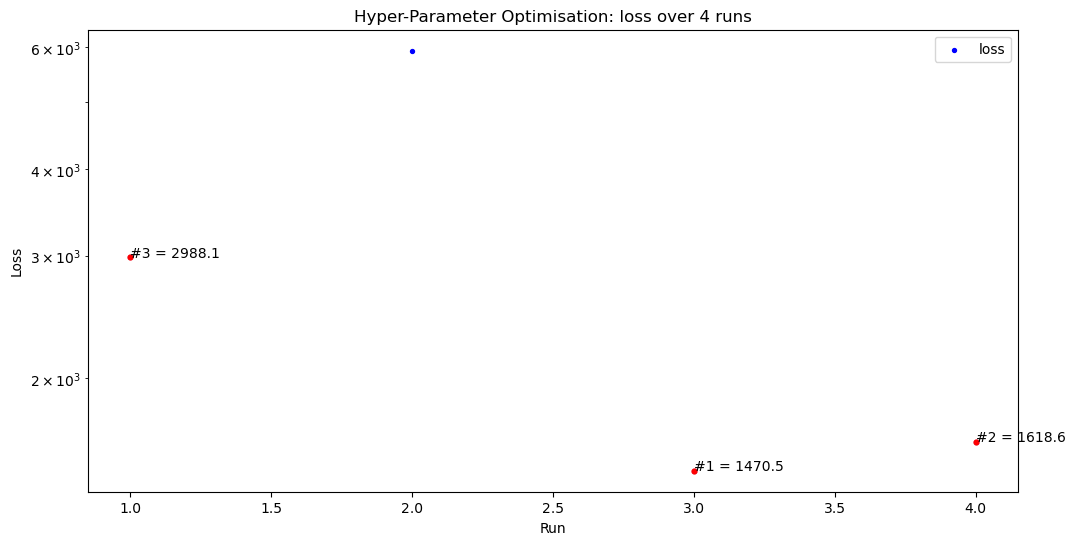

Hyper-Parameter tuning#11: [params]

optimiser: Adam batch=32, learning_rate=0.0009, weight_decay=3.5e-06
StepWiseMLP control=119, depth=5, ratio=0.58
StepWiseMLPAutoEncoder compression: 8.6 x smaller
model=StepWiseMLP, approx size=8,302,270 parameters, exact=8,302,270, difference=0.0000%
model: StepWiseMLP control=119, depth=5, ratio=0.58 (size=8,302,270)
train=950 samples, batch=32 --> 29.7 batches/epoch
total=12 sec, epoch=1 (11.7 sec/epoch), train=2692.38 (0.00%), test=2416.34 (0.00%), overfit=0.90
total=23 sec, epoch=2 (11.5 sec/epoch), train=1853.97 (-31.14%), test=1918.65 (-20.60%), overfit=1.03
total=34 sec, epoch=3 (11.4 sec/epoch), train=1536.07 (-17.15%), test=1812.23 (-5.55%), overfit=1.18
total=45 sec, epoch=4 (11.3 sec/epoch), train=1499.86 (-2.36%), test=1796.34 (-0.88%), overfit=1.20
total=56 sec, epoch=5 (11.3 sec/epoch), train=1488.73 (-0.74%), test=1789.69 (-0.37%), overfit=1.20
total=68 sec, epoch=6 (11.3 sec/epoch), train=1479.90 (-0.59%), test=1758.08 (-1.77%), ov

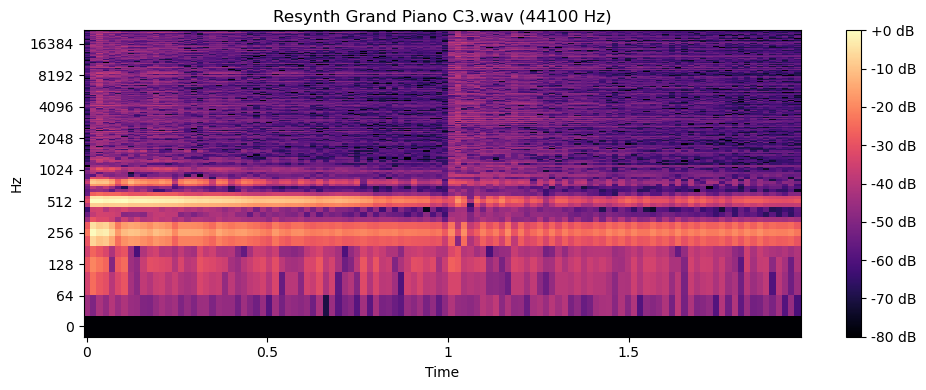

total=100 sec, epoch=9 (11.1 sec/epoch), train=1236.11 (-2.06%), test=1408.02 (-5.78%), overfit=1.14
*** Best! loss=1115.81, StepWiseMLP control=119, depth=5, ratio=0.58 (size=8,302,270), Adam batch=32, learning_rate=0.0009, weight_decay=3.5e-06
hyper-parameters: [5, 2.8167328590553255e-05, 3.489351646595387e-06, 119, 5, 0.5848544343363209]


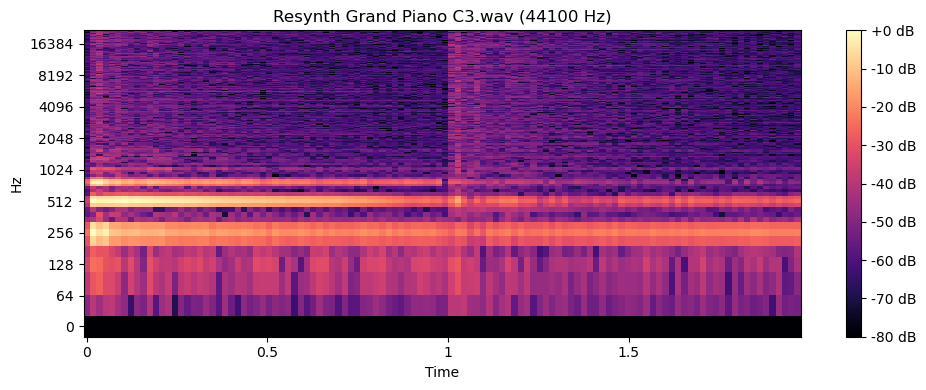

total=112 sec, epoch=10 (11.2 sec/epoch), train=1115.81 (-9.73%), test=1335.56 (-5.15%), overfit=1.20
Model is overfitting: overfit=1.16 vs max=1.1


Finished Training after 10 epochs in 112.1 sec (11.21 sec/epoch), sample duration=2.0 sec, test loss=1335.56, train loss=1115.81, overfit=1.2


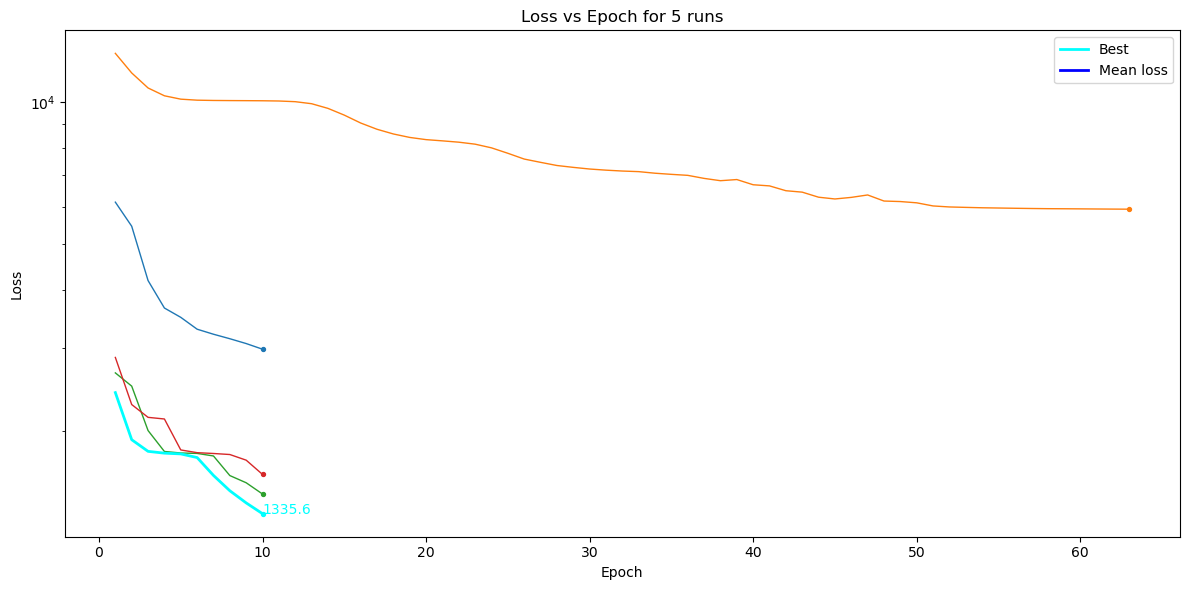



Best Models:
	1: loss=1335.6, for StepWiseMLP control=119, depth=5, ratio=0.58 (size=8,302,270), Adam batch=32, learning_rate=0.0009, weight_decay=3.5e-06
	2: loss=1470.5, for StepWiseMLP control=36, depth=5, ratio=0.17 (size=5,331,188), Adam batch=32, learning_rate=0.00093, weight_decay=0.00017
	3: loss=1618.6, for StepWiseMLP control=27, depth=5, ratio=0.14 (size=5,159,485), Adam batch=32, learning_rate=0.00087, weight_decay=0.00024


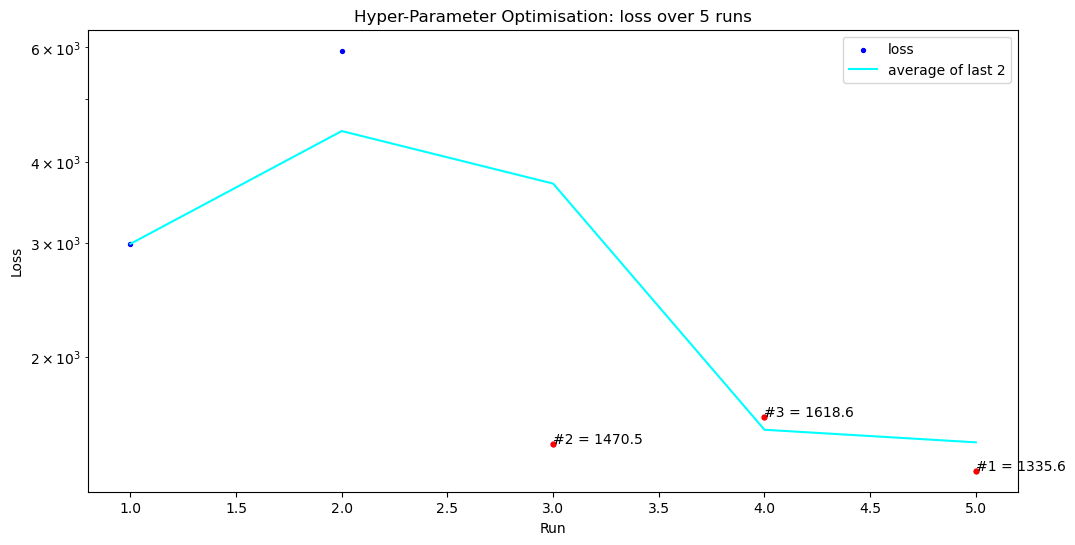

Hyper-Parameter tuning#12: [params]

optimiser: Adam batch=32, learning_rate=0.00095, weight_decay=1e-09
StepWiseMLP control=200, depth=5, ratio=10.00
StepWiseMLPAutoEncoder compression: 5.1 x smaller
model=StepWiseMLP, approx size=18,492,100 parameters, exact=18,492,100, difference=0.0000%
model: StepWiseMLP control=200, depth=5, ratio=10.00 (size=18,492,100)
train=950 samples, batch=32 --> 29.7 batches/epoch
total=13 sec, epoch=1 (12.6 sec/epoch), train=2703.74 (0.00%), test=2461.59 (0.00%), overfit=0.91
total=25 sec, epoch=2 (12.4 sec/epoch), train=1898.71 (-29.77%), test=2152.86 (-12.54%), overfit=1.13
total=37 sec, epoch=3 (12.3 sec/epoch), train=1828.87 (-3.68%), test=2129.54 (-1.08%), overfit=1.16
total=49 sec, epoch=4 (12.2 sec/epoch), train=1690.14 (-7.59%), test=1870.31 (-12.17%), overfit=1.11


In [ ]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
optimise_hyper_parameters()

# Alternatively: train a model with the best hyper-parameters we've found so far.
#train_best_params()

In [ ]:
# Generate some new samples, either by interpolation or random perturbation
from Generate import *

# Test every sample and measure the error.
test_all()

# Create graphs of pair-wise encoding plots for a number of categories:
#plot_categories(["Vocal", "Piano", "Strings"])
plot_categories()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
plot_encodings()

#generate_morphs()

#generate_variations()

# Generate samples from each variable
#generate_main_encodings()